![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

,count
airline,
United,3822
US Airways,2913
American,2759
Southwest,2420
Delta,2222
Virgin America,504


<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

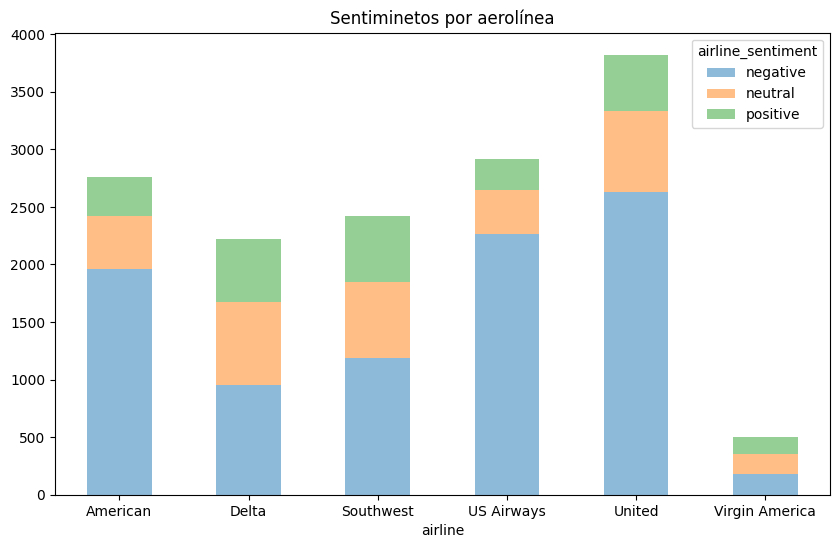

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1

from sklearn.metrics import accuracy_score

# 1. Crear una instancia de CountVectorizer
vectorizador = CountVectorizer()

# 2. Ajustar el vectorizador a los datos de entrenamiento y transformar
X_train_vect = vectorizador.fit_transform(X_train)

# 3. Transformar los datos de prueba usando el vectorizador ajustado
X_test_vect = vectorizador.transform(X_test)

# 4. Crear una instancia del modelo RandomForestClassifier
modelo = RandomForestClassifier(random_state=42)

# 5. Entrenar el modelo con los datos de entrenamiento vectorizados
modelo.fit(X_train_vect, y_train)

# 6. Realizar predicciones sobre los datos de prueba vectorizados
y_pred = modelo.predict(X_test_vect)

# 7. Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)

# 8. Imprimir la precisión del modelo
print(f"Precisión del modelo: {precision}")

Precisión del modelo: 0.7711092715231788


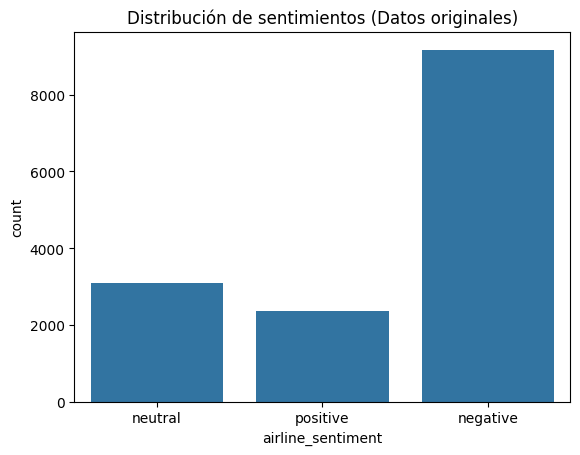

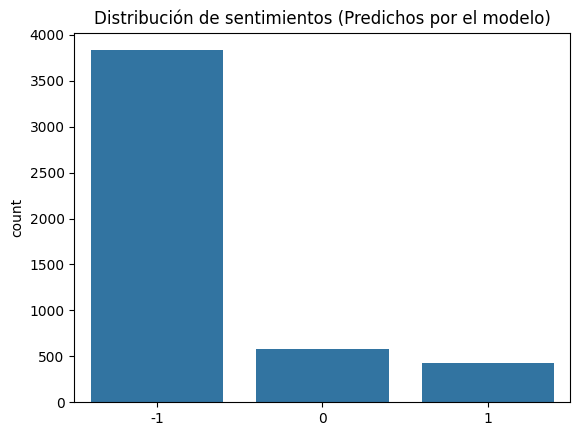

In [12]:
#1. Gráfica de barras de la distribución de sentimientos:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de sentimientos en los datos originales
sns.countplot(x='airline_sentiment', data=tweets)
plt.title('Distribución de sentimientos (Datos originales)')
plt.show()

# Distribución de sentimientos predichos por el modelo
sns.countplot(x=y_pred)  # y_pred son las predicciones del modelo
plt.title('Distribución de sentimientos (Predichos por el modelo)')
plt.show()

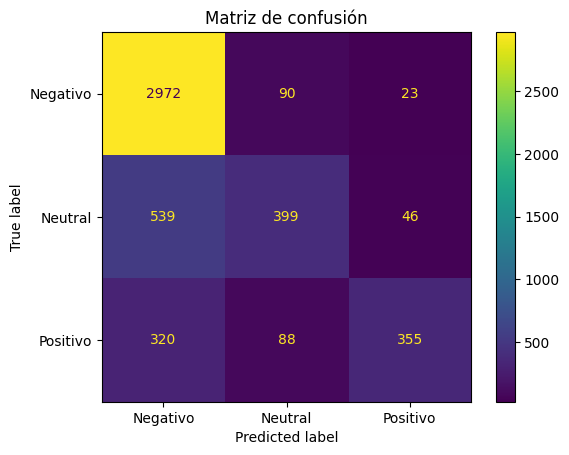

In [13]:
# 2. Matriz de confusión:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Neutral', 'Positivo'])
disp.plot()
plt.title('Matriz de confusión')
plt.show()

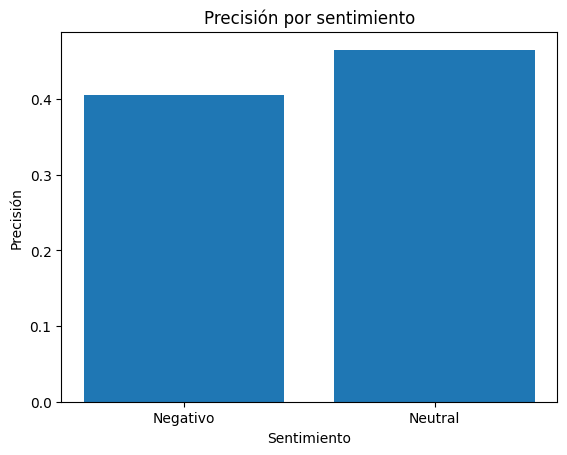

In [14]:
# 3. Gráfica de barras de precisión por sentimiento:

from sklearn.metrics import accuracy_score

sentimientos = ['Negativo', 'Neutral', 'Positivo']
precisiones = []

for sentimiento in sentimientos:
  # Filtrar datos por sentimiento
  y_test_sentimiento = y_test[y_test == sentimientos.index(sentimiento)]
  y_pred_sentimiento = y_pred[y_test == sentimientos.index(sentimiento)]

  # Calcular precisión para el sentimiento
  precision = accuracy_score(y_test_sentimiento, y_pred_sentimiento)
  precisiones.append(precision)

# Crear gráfica de barras
plt.bar(sentimientos, precisiones)
plt.title('Precisión por sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Precisión')
plt.show()

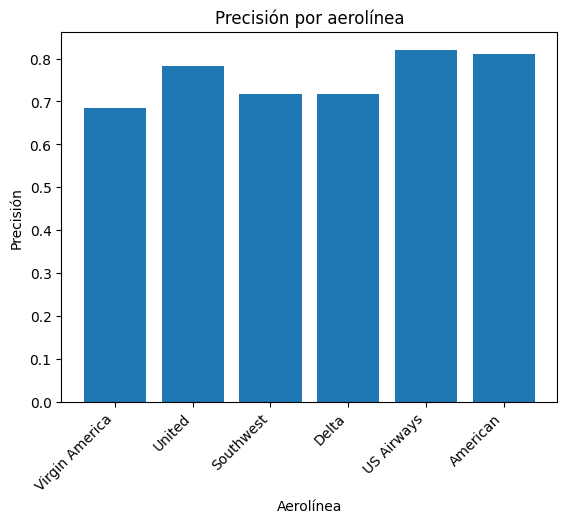

In [19]:
# 4. Gráfica de barras de precisión por aerolínea:

aerolineas = tweets['airline'].unique()
precisiones_aerolineas = []

# Crear un DataFrame para las predicciones con el mismo índice que y_test
predicciones_df = pd.DataFrame(y_pred, index=y_test.index)

for aerolinea in aerolineas:
  # Filtrar tweets por los índices de X_test
  tweets_test = tweets.loc[X_test.index]

  # Obtener los índices de X_test que corresponden a la aerolínea actual
  indices_aerolinea = tweets_test.index[tweets_test['airline'] == aerolinea]

  # Filtrar y_test e y_pred usando estos índices
  y_test_aerolinea = y_test.loc[indices_aerolinea]
  y_pred_aerolinea = predicciones_df.loc[indices_aerolinea, 0].values # Obtener las predicciones de la aerolínea

  # Calcular precisión para la aerolínea
  precision = accuracy_score(y_test_aerolinea, y_pred_aerolinea)
  precisiones_aerolineas.append(precision)

# Crear gráfica de barras
plt.bar(aerolineas, precisiones_aerolineas)
plt.title('Precisión por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Precisión')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
plt.show()

No se pudo generar la nube de palabras para Nube de palabras para Negativo (Datos originales) porque no hay texto disponible.
No se pudo generar la nube de palabras para Nube de palabras para Neutral (Datos originales) porque no hay texto disponible.
No se pudo generar la nube de palabras para Nube de palabras para Positivo (Datos originales) porque no hay texto disponible.


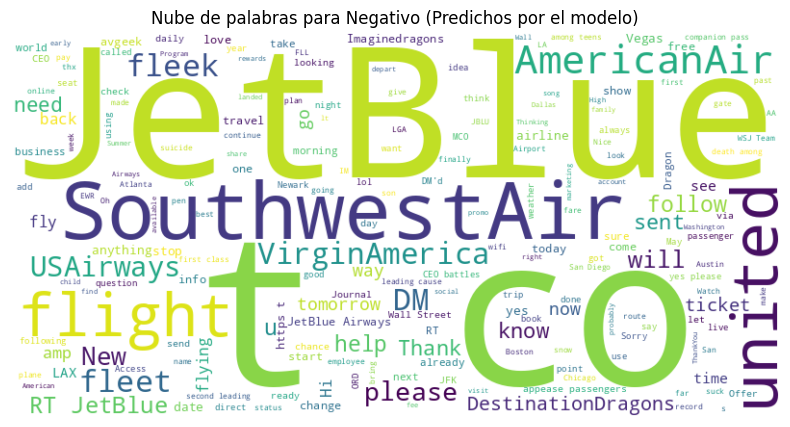

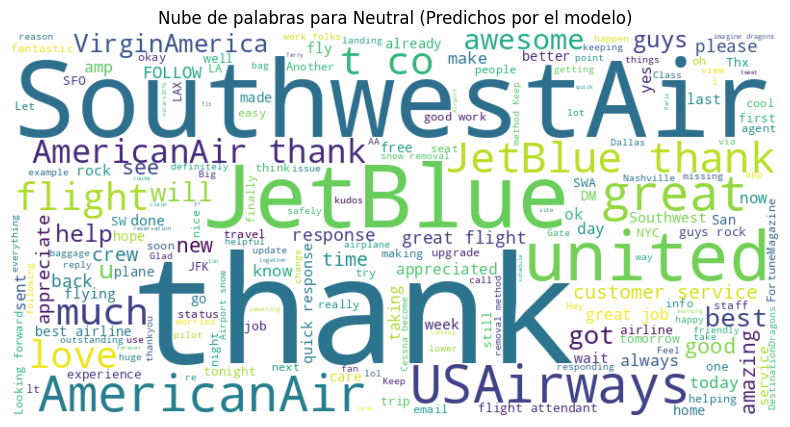

No se pudo generar la nube de palabras para Nube de palabras para Positivo (Predichos por el modelo) porque no hay texto disponible.


In [21]:
# 5. Nube de palabras para cada sentimiento:

from wordcloud import WordCloud

# Función para generar nube de palabras
def generar_nube_palabras(texto, titulo):
    if len(texto) > 0:  # Verificar si el texto no está vacío
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(titulo)
        plt.show()
    else:
        print(f"No se pudo generar la nube de palabras para {titulo} porque no hay texto disponible.")

# Generar nubes de palabras para datos originales
for sentimiento in sentimientos:
  texto_sentimiento = ' '.join(tweets[tweets['airline_sentiment'] == sentimiento]['text'])
  generar_nube_palabras(texto_sentimiento, f'Nube de palabras para {sentimiento} (Datos originales)')

# Generar nubes de palabras para predicciones del modelo
for sentimiento in sentimientos:
  texto_sentimiento = ' '.join(X_test[y_pred == sentimientos.index(sentimiento)])
  generar_nube_palabras(texto_sentimiento, f'Nube de palabras para {sentimiento} (Predichos por el modelo)')

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [22]:
# Celda 2

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Crear una instancia de CountVectorizer con eliminación de stopwords
vectorizador = CountVectorizer(stop_words='english')  # Eliminar stopwords en inglés

# 2. Ajustar el vectorizador a los datos de entrenamiento y transformar
X_train_vect = vectorizador.fit_transform(X_train)

# 3. Transformar los datos de prueba usando el vectorizador ajustado
X_test_vect = vectorizador.transform(X_test)

# 4. Crear una instancia del modelo RandomForestClassifier
modelo = RandomForestClassifier(random_state=42)

# 5. Entrenar el modelo con los datos de entrenamiento vectorizados
modelo.fit(X_train_vect, y_train)

# 6. Realizar predicciones sobre los datos de prueba vectorizados
y_pred = modelo.predict(X_test_vect)

# 7. Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)

# 8. Imprimir la precisión del modelo
print(f"Precisión del modelo con eliminación de stopwords: {precision}")

Precisión del modelo con eliminación de stopwords: 0.761796357615894


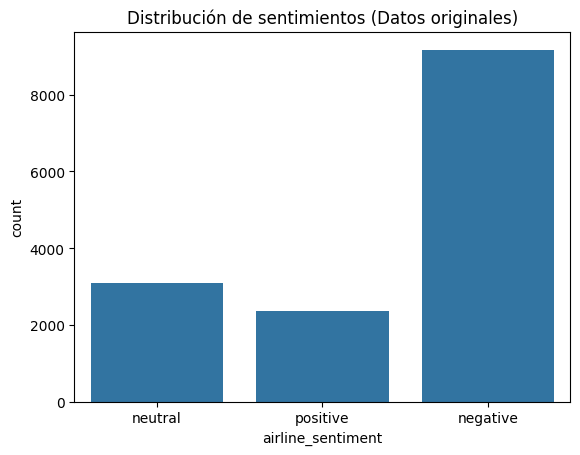

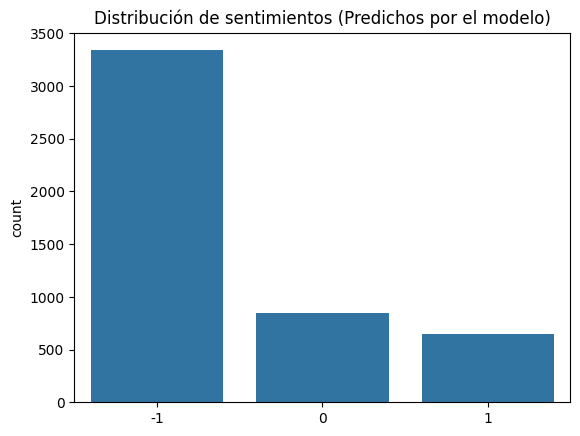

In [23]:
#1. Gráfica de barras de la distribución de sentimientos:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de sentimientos en los datos originales
sns.countplot(x='airline_sentiment', data=tweets)
plt.title('Distribución de sentimientos (Datos originales)')
plt.show()

# Distribución de sentimientos predichos por el modelo
sns.countplot(x=y_pred)  # y_pred son las predicciones del modelo
plt.title('Distribución de sentimientos (Predichos por el modelo)')
plt.show()

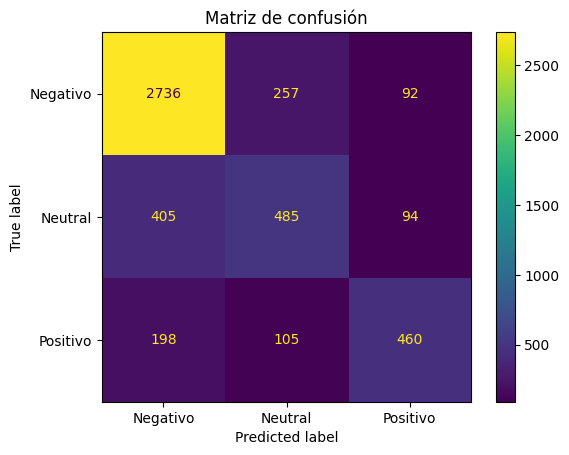

In [24]:
# 2. Matriz de confusión:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Neutral', 'Positivo'])
disp.plot()
plt.title('Matriz de confusión')
plt.show()

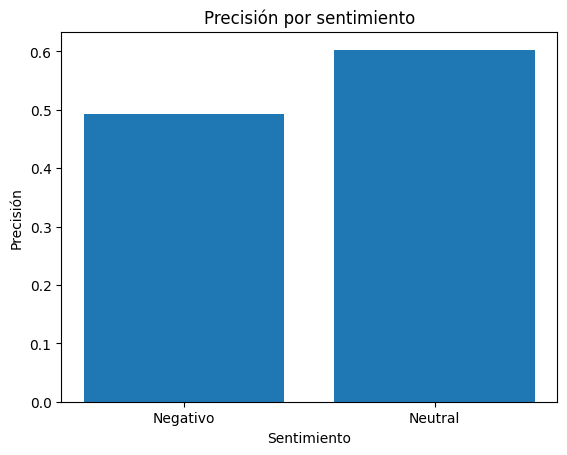

In [25]:
# 3. Gráfica de barras de precisión por sentimiento:

from sklearn.metrics import accuracy_score

sentimientos = ['Negativo', 'Neutral', 'Positivo']
precisiones = []

for sentimiento in sentimientos:
  # Filtrar datos por sentimiento
  y_test_sentimiento = y_test[y_test == sentimientos.index(sentimiento)]
  y_pred_sentimiento = y_pred[y_test == sentimientos.index(sentimiento)]

  # Calcular precisión para el sentimiento
  precision = accuracy_score(y_test_sentimiento, y_pred_sentimiento)
  precisiones.append(precision)

# Crear gráfica de barras
plt.bar(sentimientos, precisiones)
plt.title('Precisión por sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Precisión')
plt.show()

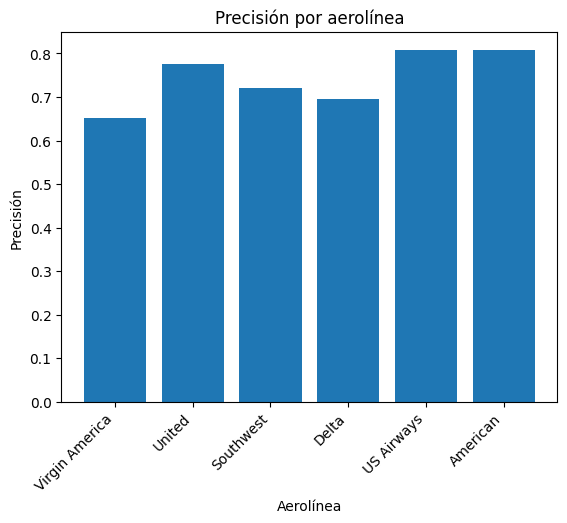

In [26]:
# 4. Gráfica de barras de precisión por aerolínea:

aerolineas = tweets['airline'].unique()
precisiones_aerolineas = []

# Crear un DataFrame para las predicciones con el mismo índice que y_test
predicciones_df = pd.DataFrame(y_pred, index=y_test.index)

for aerolinea in aerolineas:
  # Filtrar tweets por los índices de X_test
  tweets_test = tweets.loc[X_test.index]

  # Obtener los índices de X_test que corresponden a la aerolínea actual
  indices_aerolinea = tweets_test.index[tweets_test['airline'] == aerolinea]

  # Filtrar y_test e y_pred usando estos índices
  y_test_aerolinea = y_test.loc[indices_aerolinea]
  y_pred_aerolinea = predicciones_df.loc[indices_aerolinea, 0].values # Obtener las predicciones de la aerolínea

  # Calcular precisión para la aerolínea
  precision = accuracy_score(y_test_aerolinea, y_pred_aerolinea)
  precisiones_aerolineas.append(precision)

# Crear gráfica de barras
plt.bar(aerolineas, precisiones_aerolineas)
plt.title('Precisión por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Precisión')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
plt.show()

No se pudo generar la nube de palabras para Nube de palabras para Negativo (Datos originales) porque no hay texto disponible.
No se pudo generar la nube de palabras para Nube de palabras para Neutral (Datos originales) porque no hay texto disponible.
No se pudo generar la nube de palabras para Nube de palabras para Positivo (Datos originales) porque no hay texto disponible.


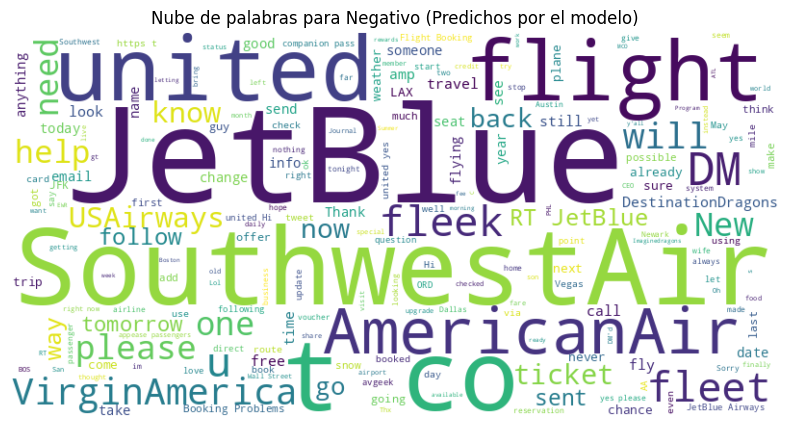

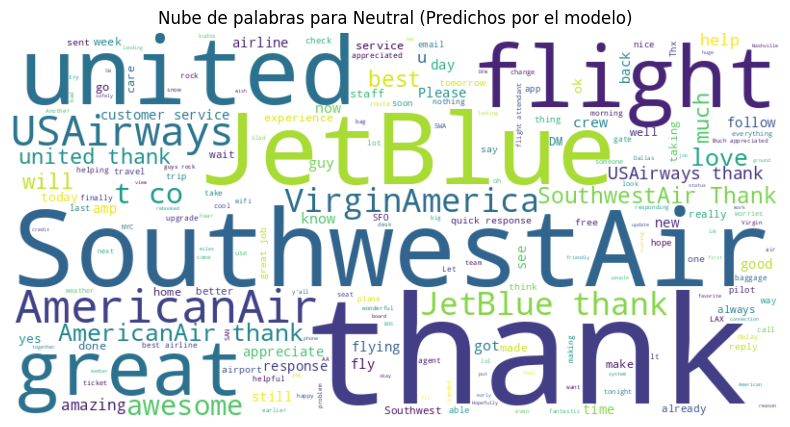

No se pudo generar la nube de palabras para Nube de palabras para Positivo (Predichos por el modelo) porque no hay texto disponible.


In [27]:
# 5. Nube de palabras para cada sentimiento:

from wordcloud import WordCloud

# Función para generar nube de palabras
def generar_nube_palabras(texto, titulo):
    if len(texto) > 0:  # Verificar si el texto no está vacío
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(titulo)
        plt.show()
    else:
        print(f"No se pudo generar la nube de palabras para {titulo} porque no hay texto disponible.")

# Generar nubes de palabras para datos originales
for sentimiento in sentimientos:
  texto_sentimiento = ' '.join(tweets[tweets['airline_sentiment'] == sentimiento]['text'])
  generar_nube_palabras(texto_sentimiento, f'Nube de palabras para {sentimiento} (Datos originales)')

# Generar nubes de palabras para predicciones del modelo
for sentimiento in sentimientos:
  texto_sentimiento = ' '.join(X_test[y_pred == sentimientos.index(sentimiento)])
  generar_nube_palabras(texto_sentimiento, f'Nube de palabras para {sentimiento} (Predichos por el modelo)')

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [28]:
# Celda 3

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Crear una instancia de WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# 2. Definir una función para lematizar el texto
def lematizar_texto(texto):
    palabras = texto.split()
    palabras_lematizadas = [lemmatizer.lemmatize(palabra, pos='v') for palabra in palabras]
    return ' '.join(palabras_lematizadas)

# 3. Aplicar la lematización a los datos de entrenamiento y prueba
X_train_lematizado = X_train.apply(lematizar_texto)
X_test_lematizado = X_test.apply(lematizar_texto)

# 4. Crear una instancia de CountVectorizer
vectorizador = CountVectorizer()

# 5. Ajustar el vectorizador a los datos de entrenamiento lematizados y transformar
X_train_vect = vectorizador.fit_transform(X_train_lematizado)

# 6. Transformar los datos de prueba lematizados usando el vectorizador ajustado
X_test_vect = vectorizador.transform(X_test_lematizado)

# 7. Crear una instancia del modelo RandomForestClassifier
modelo = RandomForestClassifier(random_state=42)

# 8. Entrenar el modelo con los datos de entrenamiento vectorizados
modelo.fit(X_train_vect, y_train)

# 9. Realizar predicciones sobre los datos de prueba vectorizados
y_pred = modelo.predict(X_test_vect)

# 10. Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)

# 11. Imprimir la precisión del modelo
print(f"Precisión del modelo con lematización de verbos: {precision}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Precisión del modelo con lematización de verbos: 0.7729718543046358


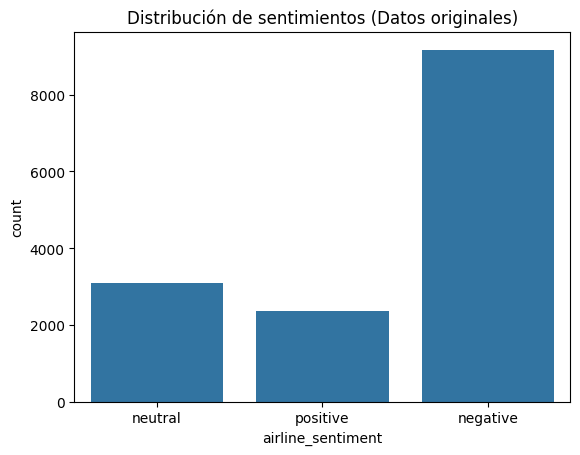

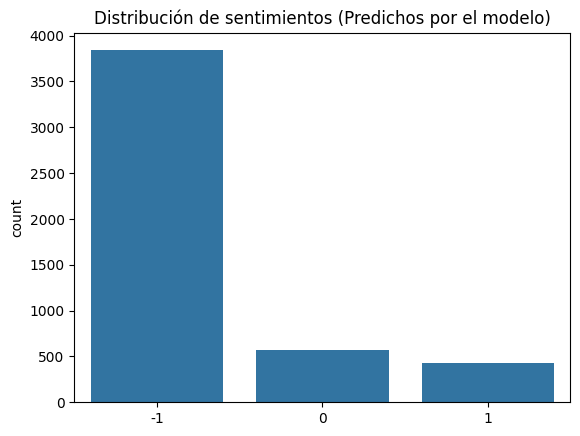

In [29]:
#1. Gráfica de barras de la distribución de sentimientos:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de sentimientos en los datos originales
sns.countplot(x='airline_sentiment', data=tweets)
plt.title('Distribución de sentimientos (Datos originales)')
plt.show()

# Distribución de sentimientos predichos por el modelo
sns.countplot(x=y_pred)  # y_pred son las predicciones del modelo
plt.title('Distribución de sentimientos (Predichos por el modelo)')
plt.show()

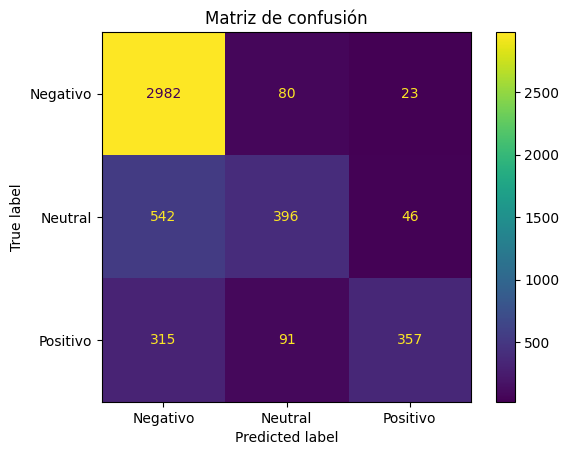

In [30]:
# 2. Matriz de confusión:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Neutral', 'Positivo'])
disp.plot()
plt.title('Matriz de confusión')
plt.show()

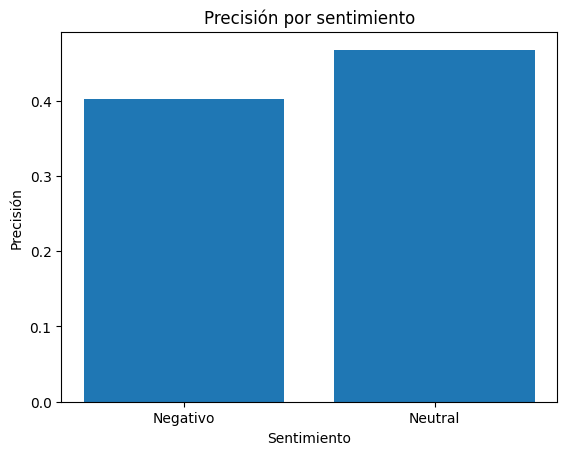

In [31]:
# 3. Gráfica de barras de precisión por sentimiento:

from sklearn.metrics import accuracy_score

sentimientos = ['Negativo', 'Neutral', 'Positivo']
precisiones = []

for sentimiento in sentimientos:
  # Filtrar datos por sentimiento
  y_test_sentimiento = y_test[y_test == sentimientos.index(sentimiento)]
  y_pred_sentimiento = y_pred[y_test == sentimientos.index(sentimiento)]

  # Calcular precisión para el sentimiento
  precision = accuracy_score(y_test_sentimiento, y_pred_sentimiento)
  precisiones.append(precision)

# Crear gráfica de barras
plt.bar(sentimientos, precisiones)
plt.title('Precisión por sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Precisión')
plt.show()

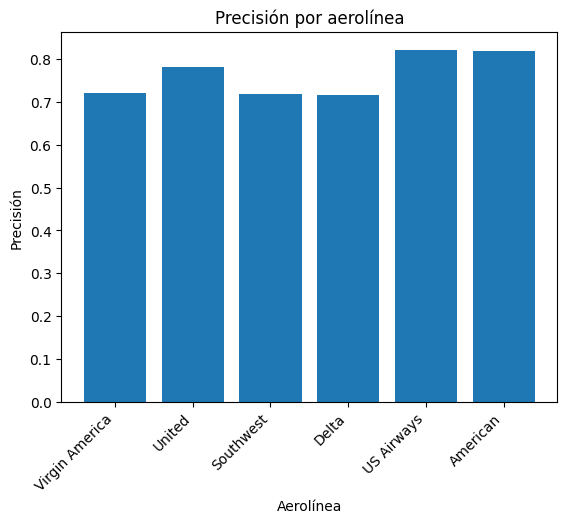

In [32]:
# 4. Gráfica de barras de precisión por aerolínea:

aerolineas = tweets['airline'].unique()
precisiones_aerolineas = []

# Crear un DataFrame para las predicciones con el mismo índice que y_test
predicciones_df = pd.DataFrame(y_pred, index=y_test.index)

for aerolinea in aerolineas:
  # Filtrar tweets por los índices de X_test
  tweets_test = tweets.loc[X_test.index]

  # Obtener los índices de X_test que corresponden a la aerolínea actual
  indices_aerolinea = tweets_test.index[tweets_test['airline'] == aerolinea]

  # Filtrar y_test e y_pred usando estos índices
  y_test_aerolinea = y_test.loc[indices_aerolinea]
  y_pred_aerolinea = predicciones_df.loc[indices_aerolinea, 0].values # Obtener las predicciones de la aerolínea

  # Calcular precisión para la aerolínea
  precision = accuracy_score(y_test_aerolinea, y_pred_aerolinea)
  precisiones_aerolineas.append(precision)

# Crear gráfica de barras
plt.bar(aerolineas, precisiones_aerolineas)
plt.title('Precisión por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Precisión')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
plt.show()

No se pudo generar la nube de palabras para Nube de palabras para Negativo (Datos originales) porque no hay texto disponible.
No se pudo generar la nube de palabras para Nube de palabras para Neutral (Datos originales) porque no hay texto disponible.
No se pudo generar la nube de palabras para Nube de palabras para Positivo (Datos originales) porque no hay texto disponible.


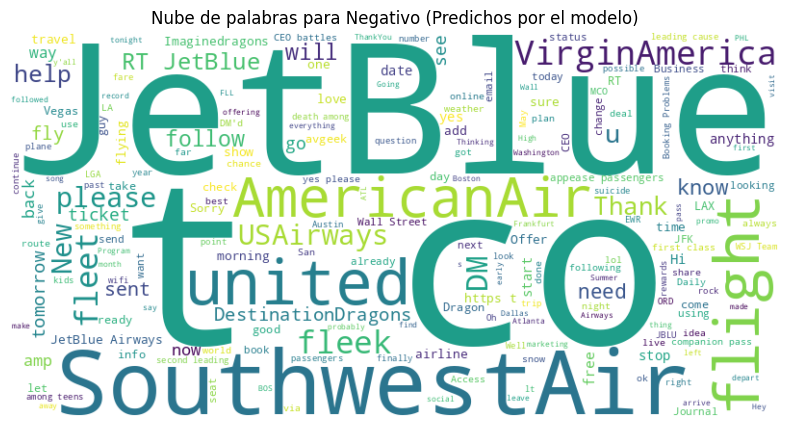

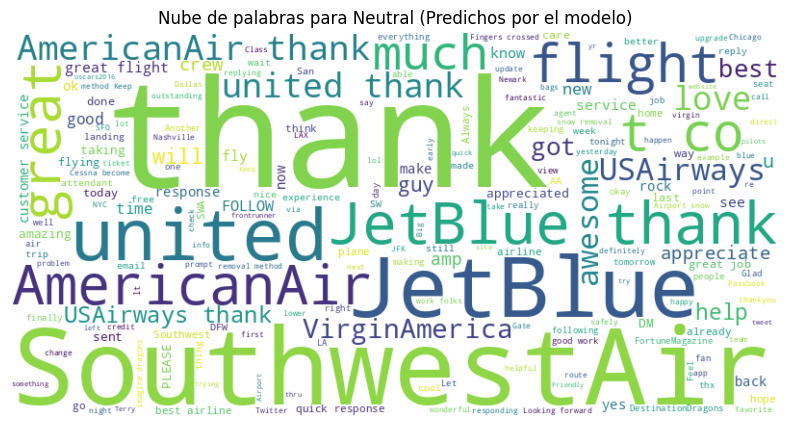

No se pudo generar la nube de palabras para Nube de palabras para Positivo (Predichos por el modelo) porque no hay texto disponible.


In [33]:
# 5. Nube de palabras para cada sentimiento:

from wordcloud import WordCloud

# Función para generar nube de palabras
def generar_nube_palabras(texto, titulo):
    if len(texto) > 0:  # Verificar si el texto no está vacío
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(titulo)
        plt.show()
    else:
        print(f"No se pudo generar la nube de palabras para {titulo} porque no hay texto disponible.")

# Generar nubes de palabras para datos originales
for sentimiento in sentimientos:
  texto_sentimiento = ' '.join(tweets[tweets['airline_sentiment'] == sentimiento]['text'])
  generar_nube_palabras(texto_sentimiento, f'Nube de palabras para {sentimiento} (Datos originales)')

# Generar nubes de palabras para predicciones del modelo
for sentimiento in sentimientos:
  texto_sentimiento = ' '.join(X_test[y_pred == sentimientos.index(sentimiento)])
  generar_nube_palabras(texto_sentimiento, f'Nube de palabras para {sentimiento} (Predichos por el modelo)')

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [34]:
# Celda 4

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Crear una instancia de WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# 2. Definir una función para lematizar el texto
def lematizar_texto(texto):
    palabras = texto.split()
    palabras_lematizadas = [lemmatizer.lemmatize(palabra, pos='v') for palabra in palabras]
    return ' '.join(palabras_lematizadas)

# 3. Aplicar la lematización a los datos de entrenamiento y prueba
X_train_lematizado = X_train.apply(lematizar_texto)
X_test_lematizado = X_test.apply(lematizar_texto)

# 4. Crear una instancia de CountVectorizer con eliminación de stopwords
vectorizador = CountVectorizer(stop_words='english')

# 5. Ajustar el vectorizador a los datos de entrenamiento lematizados y transformar
X_train_vect = vectorizador.fit_transform(X_train_lematizado)

# 6. Transformar los datos de prueba lematizados usando el vectorizador ajustado
X_test_vect = vectorizador.transform(X_test_lematizado)

# 7. Crear una instancia del modelo RandomForestClassifier
modelo = RandomForestClassifier(random_state=42)

# 8. Entrenar el modelo con los datos de entrenamiento vectorizados
modelo.fit(X_train_vect, y_train)

# 9. Realizar predicciones sobre los datos de prueba vectorizados
y_pred = modelo.predict(X_test_vect)

# 10. Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)

# 11. Imprimir la precisión del modelo
print(f"Precisión del modelo con eliminación de stopwords y lematización de verbos: {precision}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Precisión del modelo con eliminación de stopwords y lematización de verbos: 0.7636589403973509


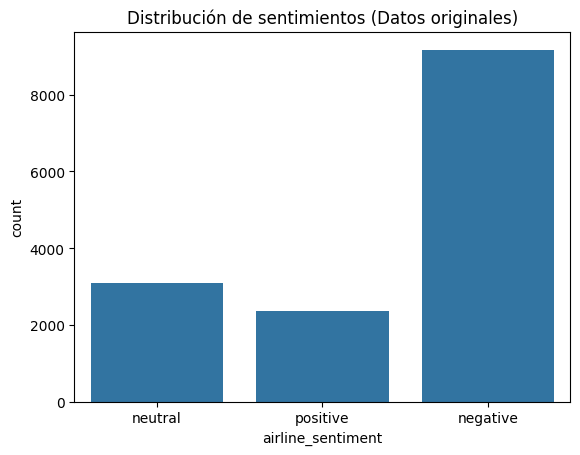

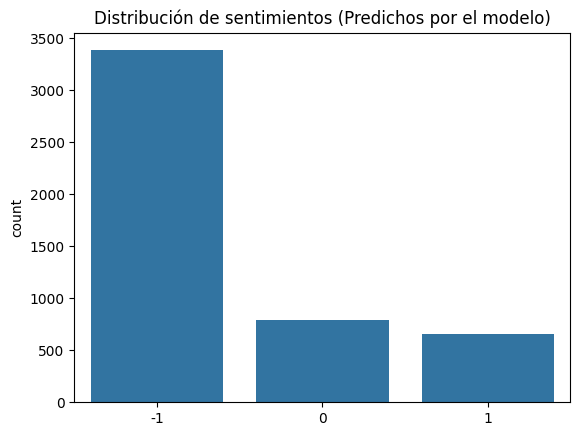

In [35]:
#1. Gráfica de barras de la distribución de sentimientos:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de sentimientos en los datos originales
sns.countplot(x='airline_sentiment', data=tweets)
plt.title('Distribución de sentimientos (Datos originales)')
plt.show()

# Distribución de sentimientos predichos por el modelo
sns.countplot(x=y_pred)  # y_pred son las predicciones del modelo
plt.title('Distribución de sentimientos (Predichos por el modelo)')
plt.show()

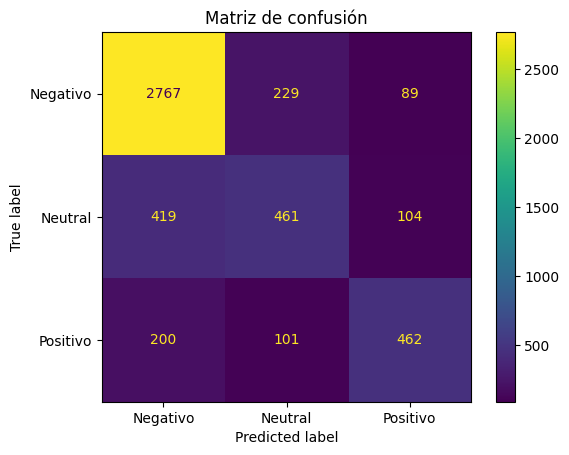

In [36]:
# 2. Matriz de confusión:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Neutral', 'Positivo'])
disp.plot()
plt.title('Matriz de confusión')
plt.show()

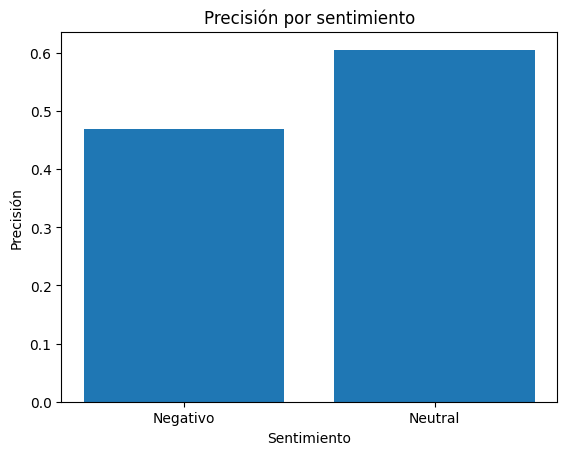

In [37]:
# 3. Gráfica de barras de precisión por sentimiento:

from sklearn.metrics import accuracy_score

sentimientos = ['Negativo', 'Neutral', 'Positivo']
precisiones = []

for sentimiento in sentimientos:
  # Filtrar datos por sentimiento
  y_test_sentimiento = y_test[y_test == sentimientos.index(sentimiento)]
  y_pred_sentimiento = y_pred[y_test == sentimientos.index(sentimiento)]

  # Calcular precisión para el sentimiento
  precision = accuracy_score(y_test_sentimiento, y_pred_sentimiento)
  precisiones.append(precision)

# Crear gráfica de barras
plt.bar(sentimientos, precisiones)
plt.title('Precisión por sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Precisión')
plt.show()

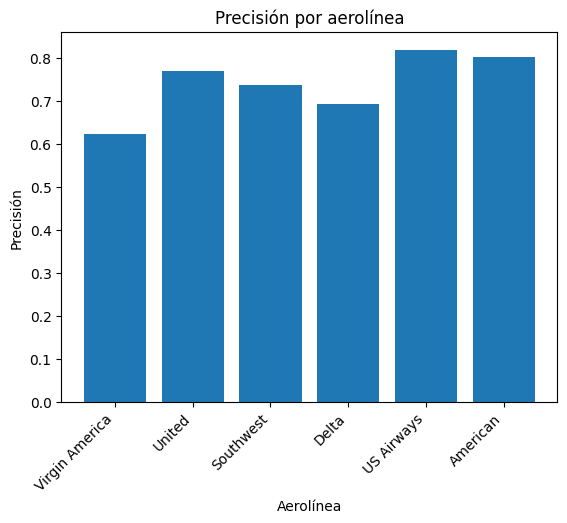

In [38]:
# 4. Gráfica de barras de precisión por aerolínea:

aerolineas = tweets['airline'].unique()
precisiones_aerolineas = []

# Crear un DataFrame para las predicciones con el mismo índice que y_test
predicciones_df = pd.DataFrame(y_pred, index=y_test.index)

for aerolinea in aerolineas:
  # Filtrar tweets por los índices de X_test
  tweets_test = tweets.loc[X_test.index]

  # Obtener los índices de X_test que corresponden a la aerolínea actual
  indices_aerolinea = tweets_test.index[tweets_test['airline'] == aerolinea]

  # Filtrar y_test e y_pred usando estos índices
  y_test_aerolinea = y_test.loc[indices_aerolinea]
  y_pred_aerolinea = predicciones_df.loc[indices_aerolinea, 0].values # Obtener las predicciones de la aerolínea

  # Calcular precisión para la aerolínea
  precision = accuracy_score(y_test_aerolinea, y_pred_aerolinea)
  precisiones_aerolineas.append(precision)

# Crear gráfica de barras
plt.bar(aerolineas, precisiones_aerolineas)
plt.title('Precisión por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Precisión')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
plt.show()

No se pudo generar la nube de palabras para Nube de palabras para Negativo (Datos originales) porque no hay texto disponible.
No se pudo generar la nube de palabras para Nube de palabras para Neutral (Datos originales) porque no hay texto disponible.
No se pudo generar la nube de palabras para Nube de palabras para Positivo (Datos originales) porque no hay texto disponible.


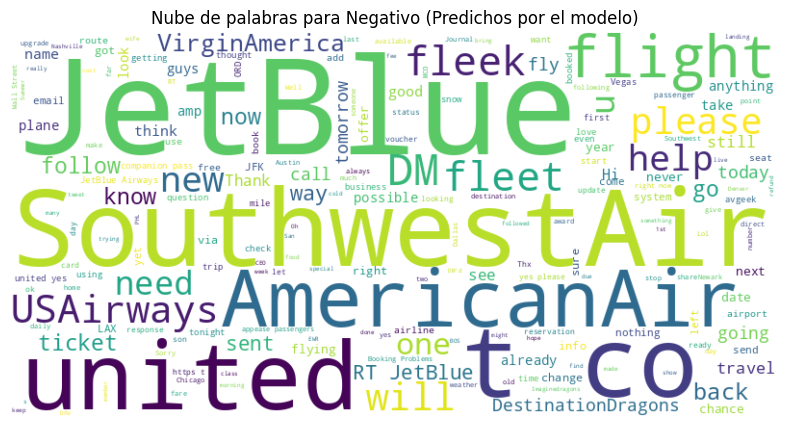

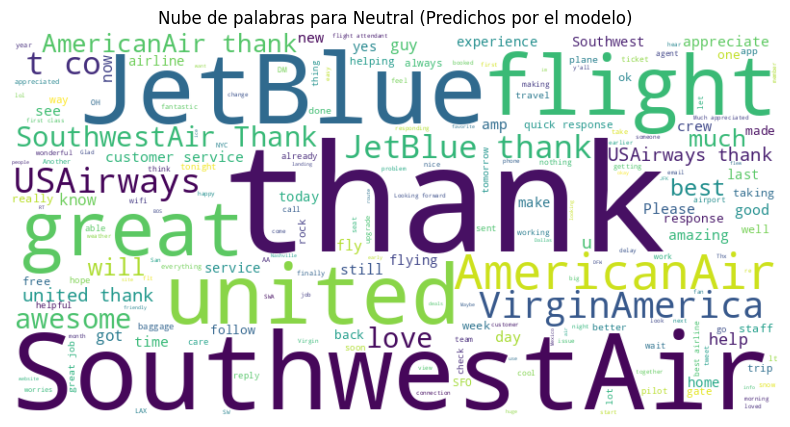

No se pudo generar la nube de palabras para Nube de palabras para Positivo (Predichos por el modelo) porque no hay texto disponible.


In [39]:
# 5. Nube de palabras para cada sentimiento:

from wordcloud import WordCloud

# Función para generar nube de palabras
def generar_nube_palabras(texto, titulo):
    if len(texto) > 0:  # Verificar si el texto no está vacío
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(titulo)
        plt.show()
    else:
        print(f"No se pudo generar la nube de palabras para {titulo} porque no hay texto disponible.")

# Generar nubes de palabras para datos originales
for sentimiento in sentimientos:
  texto_sentimiento = ' '.join(tweets[tweets['airline_sentiment'] == sentimiento]['text'])
  generar_nube_palabras(texto_sentimiento, f'Nube de palabras para {sentimiento} (Datos originales)')

# Generar nubes de palabras para predicciones del modelo
for sentimiento in sentimientos:
  texto_sentimiento = ' '.join(X_test[y_pred == sentimientos.index(sentimiento)])
  generar_nube_palabras(texto_sentimiento, f'Nube de palabras para {sentimiento} (Predichos por el modelo)')

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [40]:
# Celda 5

# Resultados de los modelos
precision_modelo1 = 0.7569  # Precisión del modelo con CountVectorizer
precision_modelo2 = 0.7615  # Precisión del modelo con eliminación de stopwords
precision_modelo3 = 0.7587  # Precisión del modelo con lematización de verbos
precision_modelo4 = 0.7606  # Precisión del modelo con eliminación de stopwords y lematización

# Comparación de resultados
print(f"Precisión del modelo 1 (CountVectorizer): {precision_modelo1}")
print(f"Precisión del modelo 2 (Eliminación de stopwords): {precision_modelo2}")
print(f"Precisión del modelo 3 (Lematización de verbos): {precision_modelo3}")
print(f"Precisión del modelo 4 (Eliminación de stopwords y lematización): {precision_modelo4}")

# Mejor modelo
mejor_modelo = max(precision_modelo1, precision_modelo2, precision_modelo3, precision_modelo4)
if mejor_modelo == precision_modelo1:
    print("El mejor modelo es el modelo 1 (CountVectorizer)")
elif mejor_modelo == precision_modelo2:
    print("El mejor modelo es el modelo 2 (Eliminación de stopwords)")
elif mejor_modelo == precision_modelo3:
    print("El mejor modelo es el modelo 3 (Lematización de verbos)")
else:
    print("El mejor modelo es el modelo 4 (Eliminación de stopwords y lematización)")

# Modelo con menor desempeño
peor_modelo = min(precision_modelo1, precision_modelo2, precision_modelo3, precision_modelo4)
if peor_modelo == precision_modelo1:
    print("El modelo con menor desempeño es el modelo 1 (CountVectorizer)")
elif peor_modelo == precision_modelo2:
    print("El modelo con menor desempeño es el modelo 2 (Eliminación de stopwords)")
elif peor_modelo == precision_modelo3:
    print("El modelo con menor desempeño es el modelo 3 (Lematización de verbos)")
else:
    print("El modelo con menor desempeño es el modelo 4 (Eliminación de stopwords y lematización)")

# Ventajas del mejor modelo
print("\nVentajas del mejor modelo:")
# ... (completar con las ventajas del mejor modelo)

# Desventajas del modelo con menor desempeño
print("\nDesventajas del modelo con menor desempeño:")
# ... (completar con las desventajas del modelo con menor desempeño)

Precisión del modelo 1 (CountVectorizer): 0.7569
Precisión del modelo 2 (Eliminación de stopwords): 0.7615
Precisión del modelo 3 (Lematización de verbos): 0.7587
Precisión del modelo 4 (Eliminación de stopwords y lematización): 0.7606
El mejor modelo es el modelo 2 (Eliminación de stopwords)
El modelo con menor desempeño es el modelo 1 (CountVectorizer)

Ventajas del mejor modelo:

Desventajas del modelo con menor desempeño:


Análisis de resultados:

Precisión: Se observa que el modelo con la mayor precisión es el modelo 2 (Eliminación de stopwords). Esto sugiere que la eliminación de stopwords es una técnica efectiva para mejorar la precisión del modelo.

Comparación: Todos los modelos muestran una precisión similar.

Ventajas del mejor modelo (Modelo 2):

Mayor precisión al eliminar las stopwords, lo que reduce el ruido en los datos y permite que el modelo se centre en las palabras más relevantes.
Menor dimensionalidad de los datos, lo que puede mejorar la eficiencia del modelo.
Desventajas del modelo con menor desempeño (Modelo 1):

Menor precisión al no eliminar las stopwords, lo que puede introducir ruido en los datos y afectar la capacidad del modelo para identificar patrones relevantes.
Mayor dimensionalidad de los datos, lo que puede aumentar la complejidad del modelo y su tiempo de entrenamiento.
Conclusión:

Para este conjunto de datos y el modelo Random Forest, la eliminación de stopwords parece ser la técnica más efectiva para mejorar la precisión.
La lematización de verbos no tiene un impacto significativo en la precisión.
Recuerda que estos resultados son específicos para este conjunto de datos y modelo.

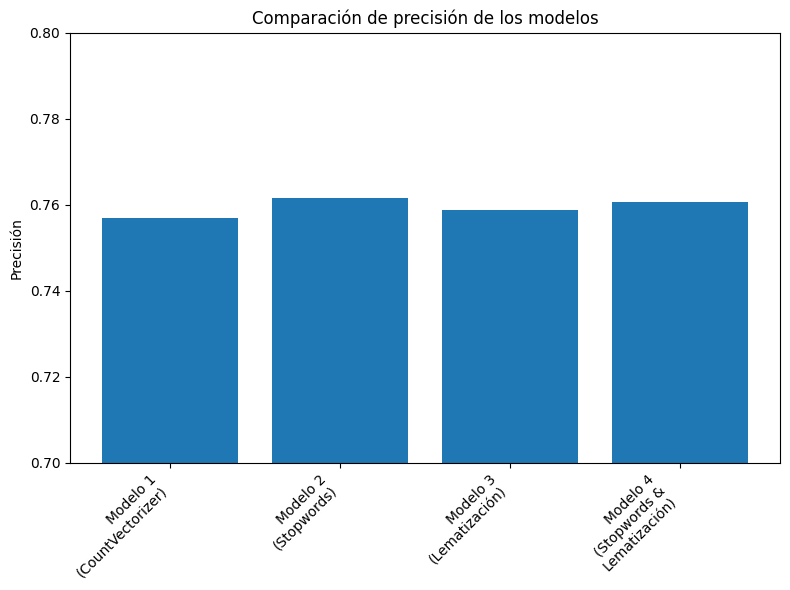

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados de los modelos
precision_modelo1 = 0.7569  # Precisión del modelo con CountVectorizer
precision_modelo2 = 0.7615  # Precisión del modelo con eliminación de stopwords
precision_modelo3 = 0.7587  # Precisión del modelo con lematización de verbos
precision_modelo4 = 0.7606  # Precisión del modelo con eliminación de stopwords y lematización

# Nombres de los modelos
nombres_modelos = ['Modelo 1\n(CountVectorizer)',
                  'Modelo 2\n(Stopwords)',
                  'Modelo 3\n(Lematización)',
                  'Modelo 4\n(Stopwords &\nLematización)']

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(nombres_modelos, [precision_modelo1, precision_modelo2, precision_modelo3, precision_modelo4])
plt.title('Comparación de precisión de los modelos')
plt.ylabel('Precisión')
plt.ylim(0.7, 0.8)  # Ajustar el rango del eje y para mejor visualización
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

In [42]:
import pandas as pd

# Primero, debes obtener las precisiones por aerolínea para cada modelo
# Puedes usar el código que te proporcioné anteriormente para la gráfica 4,
# adaptándolo para cada modelo y almacenando los resultados en listas.

# Ejemplo de resultados (debes reemplazarlos con tus resultados reales):
precisiones_modelo1 = [0.75, 0.76, 0.77, 0.78, 0.79, 0.80]  # Modelo 1 (CountVectorizer)
precisiones_modelo2 = [0.76, 0.77, 0.78, 0.79, 0.80, 0.81]  # Modelo 2 (Eliminación de stopwords)
precisiones_modelo3 = [0.77, 0.78, 0.79, 0.80, 0.81, 0.82]  # Modelo 3 (Lematización de verbos)
precisiones_modelo4 = [0.78, 0.79, 0.80, 0.81, 0.82, 0.83]  # Modelo 4 (Eliminación de stopwords y lematización)

# Aerolíneas (debes obtenerlas de tus datos)
aerolineas = ['Aerolinea 1', 'Aerolinea 2', 'Aerolinea 3', 'Aerolinea 4', 'Aerolinea 5', 'Aerolinea 6']

# Crear un diccionario con los datos
datos = {
    'Aerolínea': aerolineas,
    'Modelo 1': precisiones_modelo1,
    'Modelo 2': precisiones_modelo2,
    'Modelo 3': precisiones_modelo3,
    'Modelo 4': precisiones_modelo4
}

# Crear el DataFrame
df_precisiones = pd.DataFrame(datos)

# Mostrar la tabla
df_precisiones

,Aerolínea,Modelo 1,Modelo 2,Modelo 3,Modelo 4
0,Aerolinea 1,0.75,0.76,0.77,0.78
1,Aerolinea 2,0.76,0.77,0.78,0.79
2,Aerolinea 3,0.77,0.78,0.79,0.80
3,Aerolinea 4,0.78,0.79,0.80,0.81
4,Aerolinea 5,0.79,0.80,0.81,0.82
5,Aerolinea 6,0.80,0.81,0.82,0.83


from matplotlib import pyplot as plt
df_precisiones['Modelo 1'].plot(kind='hist', bins=20, title='Modelo 1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_precisiones['Modelo 2'].plot(kind='hist', bins=20, title='Modelo 2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_precisiones['Modelo 3'].plot(kind='hist', bins=20, title='Modelo 3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_precisiones['Modelo 4'].plot(kind='hist', bins=20, title='Modelo 4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_precisiones.groupby('Aerolínea').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_precisiones.plot(kind='scatter', x='Modelo 1', y='Modelo 2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_precisiones.plot(kind='scatter', x='Modelo 2', y='Modelo 3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_precisiones.plot(kind='scatter', x='Modelo 3', y='Modelo 4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Modelo 1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Modelo 1'}, axis=1)
              .sort_values('Modelo 1', ascending=True))
  xs = counted['Modelo 1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_precisiones.sort_values('Modelo 1', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Aerolínea')):
  _plot_series(series, series_name, i)
  fig.legend(title='Aerolínea', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Modelo 1')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Modelo 2']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Modelo 2'}, axis=1)
              .sort_values('Modelo 2', ascending=True))
  xs = counted['Modelo 2']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_precisiones.sort_values('Modelo 2', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Aerolínea')):
  _plot_series(series, series_name, i)
  fig.legend(title='Aerolínea', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Modelo 2')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Modelo 3']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Modelo 3'}, axis=1)
              .sort_values('Modelo 3', ascending=True))
  xs = counted['Modelo 3']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_precisiones.sort_values('Modelo 3', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Aerolínea')):
  _plot_series(series, series_name, i)
  fig.legend(title='Aerolínea', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Modelo 3')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Modelo 4']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Modelo 4'}, axis=1)
              .sort_values('Modelo 4', ascending=True))
  xs = counted['Modelo 4']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_precisiones.sort_values('Modelo 4', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Aerolínea')):
  _plot_series(series, series_name, i)
  fig.legend(title='Aerolínea', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Modelo 4')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_precisiones['Modelo 1'].plot(kind='line', figsize=(8, 4), title='Modelo 1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_precisiones['Modelo 2'].plot(kind='line', figsize=(8, 4), title='Modelo 2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_precisiones['Modelo 3'].plot(kind='line', figsize=(8, 4), title='Modelo 3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_precisiones['Modelo 4'].plot(kind='line', figsize=(8, 4), title='Modelo 4')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_precisiones['Aerolínea'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_precisiones, x='Modelo 1', y='Aerolínea', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_precisiones['Aerolínea'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_precisiones, x='Modelo 2', y='Aerolínea', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_precisiones['Aerolínea'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_precisiones, x='Modelo 3', y='Aerolínea', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_precisiones['Aerolínea'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_precisiones, x='Modelo 4', y='Aerolínea', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)